In this exercise, we invite participants to use Bayesian inference to estimate the prevalence of a disease.

## Aim
Suppose we collect data $X = 4$ individuals testing positive for a disease in a sample of size $N = 10$. Our aim is to estimate the disease prevalence, $\theta$, in the population the individuals were sampled from.

## Determining an appropriate probability distribution
Why would you not use a normal distribution to represent the model which generated the data?

The data are discrete, not continuous.

Why would you not use a Poisson distribution?

The data have an upper bound of $N$.

Why might a binomial distribution be an appropriate probability distribution?

It may be if we assume the individuals were randomly sampled (i.e. independently and identically distributed).

Plot the binomial distribution with $N=10$ and show how it varies across $\theta = (0.1, 0.5, 0.9)$.

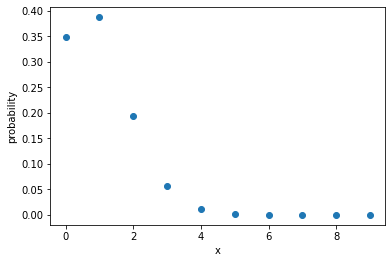

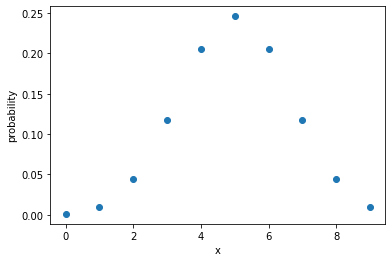

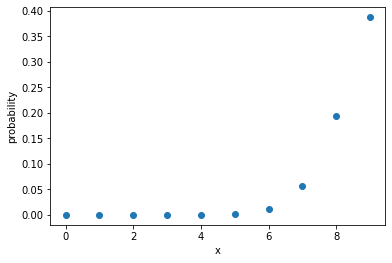

In [8]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

def plot_binom(theta, N):
    x = np.arange(0, N)
    probs = scipy.stats.binom.pmf(x, N, theta)
    plt.scatter(x, probs)
    plt.xlabel('x')
    plt.ylabel('probability')
    plt.show()

N = 10
plot_binom(0.1, N)
plot_binom(0.5, N)
plot_binom(0.9, N)

## Maximum likelihood estimation

Plot the likelihood function.

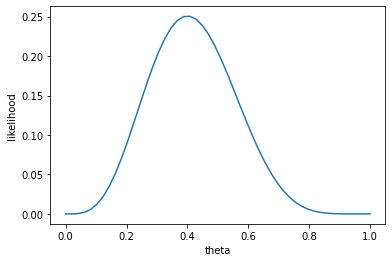

In [11]:
# generate theta values
x = 4
theta = np.linspace(0, 1)
likelihood = scipy.stats.binom.pmf(x, N, theta)

# plot the likelihood
plt.plot(theta, likelihood)
plt.xlabel('theta')
plt.ylabel('likelihood')
plt.show()

What's the maximum likelihood estimate of $\theta$?

There are two ways to handle this: one is mathematical and involves maximising the (log-)likelihood; the other just uses numerical search.

Mathematical. The likelihood is:

$L = {N \choose X} \theta^X (1-\theta)^{N-X}$

The log-likelihood is:
$\log L \propto X \log \theta + (N - X) \log (1 -\theta)$ 

Now differentiate to find max likelihood estimator:

$\frac{d\log L}{d\theta} \propto \frac{X}{\theta} - \frac{N - X}{1-\theta} = 0$

Rearranging, we get: $\theta = \frac{X}{N} = \frac{4}{10}$, i.e. the proportion of disease-positive examples in our data.

The numerical way is as below.